In [18]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import math
from sklearn.preprocessing import StandardScaler

### Steps
- Isolate the feature data
- Center and scale the feature data
- Calculate their covariance matrix
- Calculate the eigenvalues and eigenvectors
- Choose the best n principal components
- Calculate newly extracted feature data

In [14]:
filepath = '/users/kristensu/Dropbox/GA-DSI/DSI-copy/curriculum/week-07/2.4-dimensionality-reduction/'
iris = pd.read_csv(filepath + 'assets/datasets/iris.csv')

In [15]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 1: Split the set into two sets

"X" will be the data and "Y" will be the class labels

In [16]:
iris.keys()

Index([u'SepalLength', u'SepalWidth', u'PetalLength', u'PetalWidth', u'Name'], dtype='object')

In [28]:
data_cols = iris.columns[:-1]
X = iris[data_cols]
y = iris['Name']

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

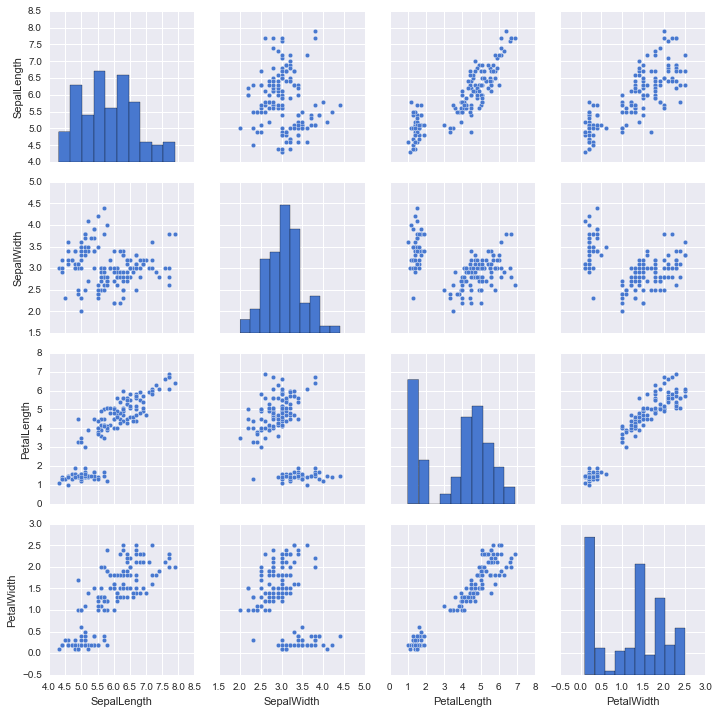

In [20]:
sns.set_palette('muted')
sns.pairplot(X)

## Step 3: Dimensionality Reduction

First, standarize the data. While the Iris data attributes are all measured in the same units (cm), this is a worthwhile step for optimization and good practice for more unruly datasets!

In [36]:
X_standard = StandardScaler().fit_transform(X)
print X.iloc[0:2, :]
X_standard[0:2]

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2


array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673]])

Now, let's set up our data for decomposition by creating a covariance matrix

Now, decompose the the covariance matrix

In [39]:
cov_mat = np.cov(X_standard.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

Check the eigenvalues and eigenvectors

In [51]:
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

print eigenValues
print ''
print eigenVectors

[ 2.93035378  0.92740362  0.14834223  0.02074601]

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [66]:
eig_pairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eig_pairs.sort()
eig_pairs.reverse()

for i,j in eig_pairs:
    print i, j

2.93035377559 [ 0.52237162 -0.26335492  0.58125401  0.56561105]
0.927403621517 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
0.148342226482 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
0.0207460139956 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]


The eigenvectors with the lowest eigenvalues can be dropped

In [70]:
eig_values = []
for i in eig_pairs:
    eig_values.append(i[0])
eig_values = [x for x in eig_values if x > 0.9]
eig_values

[2.9303537755893174, 0.92740362151734212]

Calculate the explained variance

In [72]:
tot = sum(eigenValues)
var_exp = [(i / tot)*100 for i in sorted(eigenValues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

In [73]:
tot = sum(eig_values)
var_exp = [(i / tot)*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  75.96003258,  100.        ])

What does the explained variance tell us?

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_standard)
print("The information (explained variance) contained in each principal component: ", pca.explained_variance_ratio_)
print(pca.components_)

('The information (explained variance) contained in each principal component: ', array([ 0.72770452,  0.23030523]))
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


In [76]:
eig_pairs

[(2.9303537755893174,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.92740362151734212,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648163944,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020746013995595943,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [78]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))) # Our transformation matrix
X_reduced = X_standard.dot(W)
X_reduced

array([[ -2.26454173e+00,  -5.05703903e-01],
       [ -2.08642550e+00,   6.55404729e-01],
       [ -2.36795045e+00,   3.18477311e-01],
       [ -2.30419716e+00,   5.75367713e-01],
       [ -2.38877749e+00,  -6.74767397e-01],
       [ -2.07053681e+00,  -1.51854856e+00],
       [ -2.44571134e+00,  -7.45626750e-02],
       [ -2.23384186e+00,  -2.47613932e-01],
       [ -2.34195768e+00,   1.09514636e+00],
       [ -2.18867576e+00,   4.48629048e-01],
       [ -2.16348656e+00,  -1.07059558e+00],
       [ -2.32737775e+00,  -1.58587455e-01],
       [ -2.22408272e+00,   7.09118158e-01],
       [ -2.63971626e+00,   9.38281982e-01],
       [ -2.19229151e+00,  -1.88997851e+00],
       [ -2.25146521e+00,  -2.72237108e+00],
       [ -2.20275048e+00,  -1.51375028e+00],
       [ -2.19017916e+00,  -5.14304308e-01],
       [ -1.89407429e+00,  -1.43111071e+00],
       [ -2.33994907e+00,  -1.15803343e+00],
       [ -1.91455639e+00,  -4.30465163e-01],
       [ -2.20464540e+00,  -9.52457317e-01],
       [ -

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.33, random_state=1)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print clf.score(X_test, y_test), "mean accuracy, using {0} dimensions.".format(X_standard.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=1)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print clf.score(X_test, y_test), "mean accuracy, using {0} principal component dimensions.".format(X_reduced.shape[1])

0.96 mean accuracy, using 4 dimensions.
0.94 mean accuracy, using 2 principal component dimensions.


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
